In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

%matplotlib inline

In [2]:
#Supress warnings

import warnings
warnings.filterwarnings('ignore')


pd.set_option('display.max_columns',None)

In [8]:

# Pip install Tweepy if you don't already have the package
# pip install tweepy

# Imports
import tweepy
import pandas as pd
import time
import re 
from tweepy import OAuthHandler 
from textblob import TextBlob 

In [9]:
import spacy

In [10]:
spacy.__version__

'3.5.0'

In [11]:
import nltk

In [12]:
nltk.download("vader_lexicon")

[nltk_data] Downloading package vader_lexicon to C:\Users\prakash
[nltk_data]     kotian\AppData\Roaming\nltk_data...


True

In [13]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [14]:
sid = SentimentIntensityAnalyzer()

In [16]:

# keys and tokens from the Twitter Dev Console 
consumer_key = "1wJjd9jjUwrobLlwp1u4Ri8vs"
consumer_secret = "U4HrBz8nAczVnVQhHGcCTuxcNL7vxZpjj5DTld4ROGauJpC8tQ"
access_token = "1039066641995366401-20R1QVuFdwq4ydRygzHqzb7k6lkqdl"
access_token_secret = "0yfIaszIEPorQfIP8gu7Z9TkCmVGKEDssIjlFCiPxhWmw"

# attempt authentication 
try: 
    # create OAuthHandler object 
    auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
    # set access token and secret 
    auth.set_access_token(access_token, access_token_secret)
    # create tweepy API object to fetch tweets 
    api = tweepy.API(auth,wait_on_rate_limit=True)
except: 
    print("Error: Authentication Failed") 

In [17]:
def clean_tweet(tweet): 
    ''' 
    Utility function to clean tweet text by removing links, special characters 
    using simple regex statements. 
    '''
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())


In [18]:
def get_tweet_sentiment(score): 
    ''' 
    Utility function to classify sentiment of passed tweet 
    using textblob's sentiment method 
    '''
    
    if score > 0: 
        return 'positive'
    elif score == 0: 
        return 'neutral'
    else: 
        return 'negative'


Query by Text Search
Function is focused on completing the query then providing a CSV file of that query using pandas`

In [19]:
query = "deep learning" + " " + "-filter:retweets"
count = 1500
# # Creation of query method using parameters
# tweets = tweepy.Cursor(api.search,q=query).items(count)

In [20]:
tweets = api.search_tweets(q=query, lang="en", count=count)

In [21]:
len(tweets)

94

In [22]:
tweets[0].created_at

datetime.datetime(2023, 1, 22, 14, 0, 41, tzinfo=datetime.timezone.utc)

In [23]:
dir(tweets[0])

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_api',
 '_json',
 'author',
 'contributors',
 'coordinates',
 'created_at',
 'destroy',
 'entities',
 'favorite',
 'favorite_count',
 'favorited',
 'geo',
 'id',
 'id_str',
 'in_reply_to_screen_name',
 'in_reply_to_status_id',
 'in_reply_to_status_id_str',
 'in_reply_to_user_id',
 'in_reply_to_user_id_str',
 'is_quote_status',
 'lang',
 'metadata',
 'parse',
 'parse_list',
 'place',
 'possibly_sensitive',
 'retweet',
 'retweet_count',
 'retweeted',
 'retweets',
 'source',
 'source_url',
 'text',
 'truncated',
 'user']

In [24]:
tweets[5].text

'Proposing a deep learning model that uses a novel Neuron Activity Aware (NeAW) Hebbian learning rule to dynamically… https://t.co/2695kHK8em'

In [25]:
# Pulling information from tweets iterable object
tweets_list = [[ tweet.id, tweet.created_at, tweet.text] for tweet in tweets]

In [26]:
tweets_list[0]

[1617160326213935104,
 datetime.datetime(2023, 1, 22, 14, 0, 41, tzinfo=datetime.timezone.utc),
 'Top 10 Trending Repos 🔥 on #Github \n\n1. tuning_playbook \n \nA playbook for systematically maximizing the performance… https://t.co/Eakq2r4OKy']

In [27]:
# Creation of dataframe from tweets list
# Add or remove columns as you remove tweet information
tweets_df = pd.DataFrame(tweets_list,columns=['Tweet Id', 'Datetime', 'tweet'])

In [28]:
tweets_df

,Tweet Id,Datetime,tweet
0,1617160326213935104,2023-01-22 14:00:41+00:00,Top 10 Trending Repos 🔥 on #Github \n\n1. tuni...
1,1617158867695304708,2023-01-22 13:54:54+00:00,"Read this tutorial by @anshita__bhasin, which ..."
2,1617158056898605056,2023-01-22 13:51:40+00:00,Deciding what to do today: Either a deep dive ...
3,1617157287839428610,2023-01-22 13:48:37+00:00,The satellite-image-deep-learning newsletter i...
4,1617157045236408320,2023-01-22 13:47:39+00:00,AutoDDL: Automatic Distributed Deep Learning w...
...,...,...,...
89,1617077488936488961,2023-01-22 08:31:31+00:00,Most tweeted articles today in Deep Learning:\...
90,1617076845006012419,2023-01-22 08:28:58+00:00,Improving Video Voice Dubbing Through Deep Lea...
91,1617075630259970048,2023-01-22 08:24:08+00:00,You can trust us with your class or assignment...
92,1617075343122104322,2023-01-22 08:23:00+00:00,AlphaPeptDeep: a modular deep learning framewo...


In [29]:
# clean tweet 
tweets_df["clean_text"] = tweets_df["tweet"].apply(clean_tweet)
tweets_df

,Tweet Id,Datetime,tweet,clean_text
0,1617160326213935104,2023-01-22 14:00:41+00:00,Top 10 Trending Repos 🔥 on #Github \n\n1. tuni...,Top 10 Trending Repos on Github 1 tuning playb...
1,1617158867695304708,2023-01-22 13:54:54+00:00,"Read this tutorial by @anshita__bhasin, which ...",Read this tutorial by bhasin which dives deep ...
2,1617158056898605056,2023-01-22 13:51:40+00:00,Deciding what to do today: Either a deep dive ...,Deciding what to do today Either a deep dive o...
3,1617157287839428610,2023-01-22 13:48:37+00:00,The satellite-image-deep-learning newsletter i...,The satellite image deep learning newsletter i...
4,1617157045236408320,2023-01-22 13:47:39+00:00,AutoDDL: Automatic Distributed Deep Learning w...,AutoDDL Automatic Distributed Deep Learning wi...
...,...,...,...,...
89,1617077488936488961,2023-01-22 08:31:31+00:00,Most tweeted articles today in Deep Learning:\...,Most tweeted articles today in Deep Learning R...
90,1617076845006012419,2023-01-22 08:28:58+00:00,Improving Video Voice Dubbing Through Deep Lea...,Improving Video Voice Dubbing Through Deep Lea...
91,1617075630259970048,2023-01-22 08:24:08+00:00,You can trust us with your class or assignment...,You can trust us with your class or assignment...
92,1617075343122104322,2023-01-22 08:23:00+00:00,AlphaPeptDeep: a modular deep learning framewo...,AlphaPeptDeep a modular deep learning framewor...


In [30]:
sid.polarity_scores("i hate you")

{'neg': 0.787, 'neu': 0.213, 'pos': 0.0, 'compound': -0.5719}

In [31]:
tweets_df["score"] = tweets_df["clean_text"].apply(lambda review:sid.polarity_scores(review))
# tweets_df.iloc[0]
tweets_df["score"][7]

{'neg': 0.0, 'neu': 0.605, 'pos': 0.395, 'compound': 0.7346}

In [32]:
tweets_df.head()

,Tweet Id,Datetime,tweet,clean_text,score
0,1617160326213935104,2023-01-22 14:00:41+00:00,Top 10 Trending Repos 🔥 on #Github \n\n1. tuni...,Top 10 Trending Repos on Github 1 tuning playb...,"{'neg': 0.0, 'neu': 0.878, 'pos': 0.122, 'comp..."
1,1617158867695304708,2023-01-22 13:54:54+00:00,"Read this tutorial by @anshita__bhasin, which ...",Read this tutorial by bhasin which dives deep ...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
2,1617158056898605056,2023-01-22 13:51:40+00:00,Deciding what to do today: Either a deep dive ...,Deciding what to do today Either a deep dive o...,"{'neg': 0.0, 'neu': 0.886, 'pos': 0.114, 'comp..."
3,1617157287839428610,2023-01-22 13:48:37+00:00,The satellite-image-deep-learning newsletter i...,The satellite image deep learning newsletter i...,"{'neg': 0.135, 'neu': 0.712, 'pos': 0.154, 'co..."
4,1617157045236408320,2023-01-22 13:47:39+00:00,AutoDDL: Automatic Distributed Deep Learning w...,AutoDDL Automatic Distributed Deep Learning wi...,"{'neg': 0.0, 'neu': 0.8, 'pos': 0.2, 'compound..."


In [33]:
tweets_df["compound"] = tweets_df["score"].apply(lambda d:d["compound"])
tweets_df

,Tweet Id,Datetime,tweet,clean_text,score,compound
0,1617160326213935104,2023-01-22 14:00:41+00:00,Top 10 Trending Repos 🔥 on #Github \n\n1. tuni...,Top 10 Trending Repos on Github 1 tuning playb...,"{'neg': 0.0, 'neu': 0.878, 'pos': 0.122, 'comp...",0.2023
1,1617158867695304708,2023-01-22 13:54:54+00:00,"Read this tutorial by @anshita__bhasin, which ...",Read this tutorial by bhasin which dives deep ...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
2,1617158056898605056,2023-01-22 13:51:40+00:00,Deciding what to do today: Either a deep dive ...,Deciding what to do today Either a deep dive o...,"{'neg': 0.0, 'neu': 0.886, 'pos': 0.114, 'comp...",0.4005
3,1617157287839428610,2023-01-22 13:48:37+00:00,The satellite-image-deep-learning newsletter i...,The satellite image deep learning newsletter i...,"{'neg': 0.135, 'neu': 0.712, 'pos': 0.154, 'co...",0.1280
4,1617157045236408320,2023-01-22 13:47:39+00:00,AutoDDL: Automatic Distributed Deep Learning w...,AutoDDL Automatic Distributed Deep Learning wi...,"{'neg': 0.0, 'neu': 0.8, 'pos': 0.2, 'compound...",0.3612
...,...,...,...,...,...,...
89,1617077488936488961,2023-01-22 08:31:31+00:00,Most tweeted articles today in Deep Learning:\...,Most tweeted articles today in Deep Learning R...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
90,1617076845006012419,2023-01-22 08:28:58+00:00,Improving Video Voice Dubbing Through Deep Lea...,Improving Video Voice Dubbing Through Deep Lea...,"{'neg': 0.0, 'neu': 0.714, 'pos': 0.286, 'comp...",0.4215
91,1617075630259970048,2023-01-22 08:24:08+00:00,You can trust us with your class or assignment...,You can trust us with your class or assignment...,"{'neg': 0.0, 'neu': 0.762, 'pos': 0.238, 'comp...",0.6486
92,1617075343122104322,2023-01-22 08:23:00+00:00,AlphaPeptDeep: a modular deep learning framewo...,AlphaPeptDeep a modular deep learning framewor...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000


In [34]:
tweets_df["sentiment"] = tweets_df["compound"].apply(lambda  score : get_tweet_sentiment(score))
tweets_df

,Tweet Id,Datetime,tweet,clean_text,score,compound,sentiment
0,1617160326213935104,2023-01-22 14:00:41+00:00,Top 10 Trending Repos 🔥 on #Github \n\n1. tuni...,Top 10 Trending Repos on Github 1 tuning playb...,"{'neg': 0.0, 'neu': 0.878, 'pos': 0.122, 'comp...",0.2023,positive
1,1617158867695304708,2023-01-22 13:54:54+00:00,"Read this tutorial by @anshita__bhasin, which ...",Read this tutorial by bhasin which dives deep ...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral
2,1617158056898605056,2023-01-22 13:51:40+00:00,Deciding what to do today: Either a deep dive ...,Deciding what to do today Either a deep dive o...,"{'neg': 0.0, 'neu': 0.886, 'pos': 0.114, 'comp...",0.4005,positive
3,1617157287839428610,2023-01-22 13:48:37+00:00,The satellite-image-deep-learning newsletter i...,The satellite image deep learning newsletter i...,"{'neg': 0.135, 'neu': 0.712, 'pos': 0.154, 'co...",0.1280,positive
4,1617157045236408320,2023-01-22 13:47:39+00:00,AutoDDL: Automatic Distributed Deep Learning w...,AutoDDL Automatic Distributed Deep Learning wi...,"{'neg': 0.0, 'neu': 0.8, 'pos': 0.2, 'compound...",0.3612,positive
...,...,...,...,...,...,...,...
89,1617077488936488961,2023-01-22 08:31:31+00:00,Most tweeted articles today in Deep Learning:\...,Most tweeted articles today in Deep Learning R...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral
90,1617076845006012419,2023-01-22 08:28:58+00:00,Improving Video Voice Dubbing Through Deep Lea...,Improving Video Voice Dubbing Through Deep Lea...,"{'neg': 0.0, 'neu': 0.714, 'pos': 0.286, 'comp...",0.4215,positive
91,1617075630259970048,2023-01-22 08:24:08+00:00,You can trust us with your class or assignment...,You can trust us with your class or assignment...,"{'neg': 0.0, 'neu': 0.762, 'pos': 0.238, 'comp...",0.6486,positive
92,1617075343122104322,2023-01-22 08:23:00+00:00,AlphaPeptDeep: a modular deep learning framewo...,AlphaPeptDeep a modular deep learning framewor...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral


In [35]:
del tweets_df["score"]
del tweets_df["compound"]

In [36]:
tweets_df.head()

,Tweet Id,Datetime,tweet,clean_text,sentiment
0,1617160326213935104,2023-01-22 14:00:41+00:00,Top 10 Trending Repos 🔥 on #Github \n\n1. tuni...,Top 10 Trending Repos on Github 1 tuning playb...,positive
1,1617158867695304708,2023-01-22 13:54:54+00:00,"Read this tutorial by @anshita__bhasin, which ...",Read this tutorial by bhasin which dives deep ...,neutral
2,1617158056898605056,2023-01-22 13:51:40+00:00,Deciding what to do today: Either a deep dive ...,Deciding what to do today Either a deep dive o...,positive
3,1617157287839428610,2023-01-22 13:48:37+00:00,The satellite-image-deep-learning newsletter i...,The satellite image deep learning newsletter i...,positive
4,1617157045236408320,2023-01-22 13:47:39+00:00,AutoDDL: Automatic Distributed Deep Learning w...,AutoDDL Automatic Distributed Deep Learning wi...,positive


In [37]:
tweets = []

def text_query_to_csv(text_query,count=200):
    try:
        
        query = text_query + " " + "-filter:retweets"
        # Creation of query method using parameters
        tweets = api.search_tweets(q=query, lang="en", count=count)

        # Pulling information from tweets iterable object
        tweets_list = [[ tweet.id, tweet.created_at, tweet.text] for tweet in tweets]
        
    
        # Creation of dataframe from tweets list
        # Add or remove columns as you remove tweet information
        tweets_df = pd.DataFrame(tweets_list,columns=['Tweet Id', 'Datetime', 'tweet'])
        
        # clean tweet 
        tweets_df["clean_text"] = tweets_df["tweet"].apply(lambda tweet: clean_tweet(tweet))
        
        tweets_df["score"] = tweets_df["clean_text"].apply(lambda review:sid.polarity_scores(review))
        
        tweets_df["compound"] = tweets_df["score"].apply(lambda d:d["compound"])
        tweets_df["sentiment"] = tweets_df["compound"].apply(lambda  score : get_tweet_sentiment(score))
        
        del tweets_df["score"]
        del tweets_df["compound"]
        
      
        return tweets_df

    except BaseException as e:
        print('failed on_status,',str(e))
        time.sleep(3)

# Amazon India

In [39]:
amazon_india = text_query_to_csv("amazon india") # 3000

In [40]:
amazon_india.head(10)

,Tweet Id,Datetime,tweet,clean_text,sentiment
0,1617161717657784321,2023-01-22 14:06:13+00:00,@amazonIN @amazon @MBhrigraj\n@BandBajaateRaho...,INDIA Shocking Experience Found irrelevant Duplic,negative
1,1617161309153554433,2023-01-22 14:04:36+00:00,@AmazonHelp @AmazonHelp again I am saying the...,again I am saying the same I am unable to conn...,neutral
2,1617160463154032641,2023-01-22 14:01:14+00:00,@MahatOfficial @amazon Bro STR epa Thailand ir...,Bro STR epa Thailand iruthu india vararu After...,neutral
3,1617159845454704640,2023-01-22 13:58:47+00:00,@ashishg932 @Voice_For_India Amazon.\n\nNehru'...,For India Amazon Nehru s 97 Major Blunders HB,positive
4,1617159300597829633,2023-01-22 13:56:37+00:00,@amazonIN \nOrder No - 405-1705904-0120350\n N...,Order No 405 1705904 0120350 No pick up since ...,negative
5,1617159280968273921,2023-01-22 13:56:32+00:00,"From Harper Collins, #India Instagram: Buy #Po...",From Harper Collins India Instagram Buy Politi...,negative
6,1617159197942247424,2023-01-22 13:56:12+00:00,@amazon \nOrder No - 405-1705904-0120350\n No ...,Order No 405 1705904 0120350 No pick up since ...,negative
7,1617158952915185666,2023-01-22 13:55:14+00:00,@AmazonHelp \nOrder No - 405-1705904-0120350\n...,Order No 405 1705904 0120350 No pick up since ...,negative
8,1617155936891592704,2023-01-22 13:43:15+00:00,"After a bloody air battle, an Indian fighter p...",After a bloody air battle an Indian fighter pi...,negative
9,1617154753644879874,2023-01-22 13:38:33+00:00,India and Faraway Lands at #1 on New Releases ...,India and Faraway Lands at 1 on New Releases i...,positive


In [41]:
amazon_india.to_csv('{}-tweets.csv'.format("amazon_india"), sep=',', index = False)

In [42]:
amazon_india.shape

(100, 5)

# Flipkart

In [43]:
flipkart = text_query_to_csv("chatgpt", 150) # 15mins time to compelte

In [44]:
flipkart.head(10)

,Tweet Id,Datetime,tweet,clean_text,sentiment
0,1617162079659589632,2023-01-22 14:07:39+00:00,@LouiseOFresco Or let's ask questions of farme...,Or let s ask questions of farmers instead of c...,neutral
1,1617162079231934468,2023-01-22 14:07:39+00:00,@JagersbergKnut @bindureddy I am amazed at man...,I am amazed at many similar tech exec response...,positive
2,1617162012072583173,2023-01-22 14:07:23+00:00,Going to a make quick video using ChatGPT to g...,Going to a make quick video using ChatGPT to g...,neutral
3,1617161975863336967,2023-01-22 14:07:15+00:00,In one month ChatGPT did for AI what's Blockch...,In one month ChatGPT did for AI what s Blockch...,neutral
4,1617161945269903360,2023-01-22 14:07:07+00:00,Nearly 30 percent of professionals say they ha...,Nearly 30 percent of professionals say they ha...,neutral
5,1617161942392770560,2023-01-22 14:07:07+00:00,ChatGPT fiction is getting too good https://t....,ChatGPT fiction is getting too good,positive
6,1617161924571013124,2023-01-22 14:07:02+00:00,PS: I generated this tweet using chatGPT only😂...,PS I generated this tweet using chatGPT only i...,positive
7,1617161901884203011,2023-01-22 14:06:57+00:00,"Hey @elonmusk and others, why fear #AI? I see ...",Hey and others why fear AI I see a new and adv...,positive
8,1617161896662306821,2023-01-22 14:06:56+00:00,the Google economy. Just wait till the interne...,the Google economy Just wait till the internet...,negative
9,1617161849396465666,2023-01-22 14:06:44+00:00,ChatGPT in an iOS Shortcut: Smart HomeKit Voic...,ChatGPT in an iOS Shortcut Smart HomeKit Voice...,positive


In [45]:
flipkart.to_csv('{}-tweets.csv'.format("flipkart"), sep=',', index = False)

In [46]:
flipkart.shape

(100, 5)

# snapdeal

In [47]:
snapdeal = text_query_to_csv("snapdeal", 250) # 15mins time to compelte

In [48]:
snapdeal.head(10)

,Tweet Id,Datetime,tweet,clean_text,sentiment
0,1617137507321233408,2023-01-22 12:30:01+00:00,"What better way to shine this #RepublicDay, th...",What better way to shine this RepublicDay than...,positive
1,1617132548412571653,2023-01-22 12:10:19+00:00,@flipkartsupport ordered 36 size received 44 r...,ordered 36 size received 44 requested return o...,negative
2,1617130775606095880,2023-01-22 12:03:16+00:00,@snapdeal No one fraud was called and told ref...,No one fraud was called and told refund issued...,negative
3,1617129722248396803,2023-01-22 11:59:05+00:00,@AnkurMi31097424 These OTPs can be misused by ...,These OTPs can be misused by hackers to gain a...,positive
4,1617129653092712448,2023-01-22 11:58:48+00:00,@AnkurMi31097424 Hi! Please be informed that t...,Hi Please be informed that there are some spam...,positive
5,1617129402789396482,2023-01-22 11:57:49+00:00,I received otp every minute on my number...wha...,I received otp every minute on my number what ...,positive
6,1617121195618635778,2023-01-22 11:25:12+00:00,@barnwalSanjeev @viditaatrey @meesho_support s...,support scripted answers do not work enough of...,positive
7,1617121052672270338,2023-01-22 11:24:38+00:00,@DavidVirat Hi! Hamare team ne already apko ca...,Hi Hamare team ne already apko call karke aapk...,positive
8,1617118679900065792,2023-01-22 11:15:12+00:00,@DavidVirat Hi! Jaisa ki hum check kar paa rah...,Hi Jaisa ki hum check kar paa rahe hain Hum al...,positive
9,1617109052131102722,2023-01-22 10:36:57+00:00,@skumar0914 Hi! We always request our customer...,Hi We always request our customers to never sh...,negative


In [49]:
snapdeal.to_csv('{}-tweets.csv'.format("snapdeal"), sep=',', index = False)

In [50]:
snapdeal.shape

(100, 5)

---


For Amazon India...
Positive tweets percentage: 40.0 %
Negative tweets percentage: 27.0 %
Neutral tweets percentage: 33.0 %


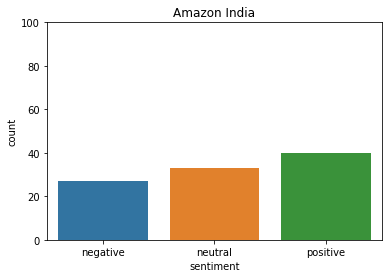

In [51]:
ax = sns.countplot(x="sentiment", data=amazon_india)
plt.ylim(0, amazon_india.shape[0])
plt.title("Amazon India")
print()

pos = round(amazon_india["sentiment"].value_counts()[0]/len(amazon_india) * 100, 2)
neu = round(amazon_india["sentiment"].value_counts()[1]/len(amazon_india) * 100, 2)
neg = round(amazon_india["sentiment"].value_counts()[2]/len(amazon_india) * 100, 2)
print("For Amazon India...")
print('Positive tweets percentage: {} %'.format(pos))
print('Negative tweets percentage: {} %'.format(neg))
print('Neutral tweets percentage: {} %'.format(neu))


For flipkart ...
Positive tweets percentage: 50.0 %
Negative tweets percentage: 15.0 %
Neutral tweets percentage: 35.0 %


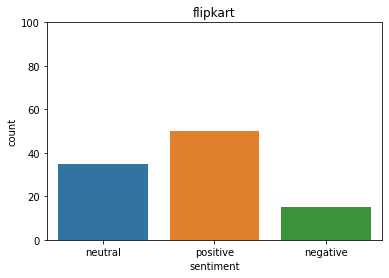

In [52]:
ax = sns.countplot(x="sentiment", data=flipkart)
plt.ylim(0, flipkart.shape[0])
plt.title("flipkart")
print()

pos = round(flipkart["sentiment"].value_counts()[0]/len(flipkart) * 100, 2)
neu = round(flipkart["sentiment"].value_counts()[1]/len(flipkart) * 100, 2)
neg = round(flipkart["sentiment"].value_counts()[2]/len(flipkart) * 100, 2)
print("For flipkart ...")
print('Positive tweets percentage: {} %'.format(pos))
print('Negative tweets percentage: {} %'.format(neg))
print('Neutral tweets percentage: {} %'.format(neu))


For snapdeal ...
Positive tweets percentage: 65.0 %
Negative tweets percentage: 13.0 %
Neutral tweets percentage: 22.0 %


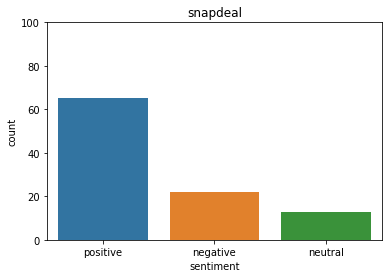

In [53]:
ax = sns.countplot(x="sentiment", data=snapdeal)
plt.ylim(0, snapdeal.shape[0])
plt.title("snapdeal")
print()

pos = round(snapdeal["sentiment"].value_counts()[0]/len(snapdeal) * 100, 2)
neu = round(snapdeal["sentiment"].value_counts()[1]/len(snapdeal) * 100, 2)
neg = round(snapdeal["sentiment"].value_counts()[2]/len(snapdeal) * 100, 2)
print("For snapdeal ...")
print('Positive tweets percentage: {} %'.format(pos))
print('Negative tweets percentage: {} %'.format(neg))
print('Neutral tweets percentage: {} %'.format(neu))

# Virat Kholi

In [58]:
virat = text_query_to_csv("Virat Kohli", 250) # 15mins time to compelte

In [56]:
virat.shape

(100, 5)


For Amazon India...
Positive tweets percentage: 46.0 %
Negative tweets percentage: 10.0 %
Neutral tweets percentage: 44.0 %


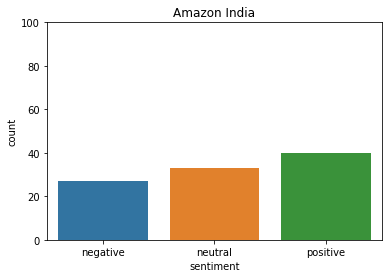

In [57]:
ax = sns.countplot(x="sentiment", data=amazon_india)
plt.ylim(0, virat.shape[0])
plt.title("Amazon India")
print()

pos = round(virat["sentiment"].value_counts()[0]/len(virat) * 100, 2)
neu = round(virat["sentiment"].value_counts()[1]/len(virat) * 100, 2)
neg = round(virat["sentiment"].value_counts()[2]/len(virat) * 100, 2)
print("For Amazon India...")
print('Positive tweets percentage: {} %'.format(pos))
print('Negative tweets percentage: {} %'.format(neg))
print('Neutral tweets percentage: {} %'.format(neu))